##  FLIGHT PREDICTION

Predicting prices of flight in an airport

#### import the dependencies

In [624]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import joblib

#### Load data

In [532]:
flight_df = pd.read_excel('Data_Train.xlsx')
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [533]:
flight_df.shape

(10683, 11)

In [534]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [535]:
flight_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [536]:
## Route and additional info has missing values but just one missing values ,so we can drop it
flight_df.dropna(inplace =True)

In [537]:
flight_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [538]:
flight_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [539]:
# converting duration
flight_df["Duration_Total_Hour"] = flight_df["Duration"].str.replace("h", '*1').str.replace(' ', '+').str.replace('m', '/60').apply(eval)
flight_df.drop('Duration',axis = 1, inplace=True)

In [540]:
flight_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_Total_Hour
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,2.833333
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,7.416667
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,19.000000
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,5.416667
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,4.750000
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,non-stop,No info,4107,2.500000
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,non-stop,No info,4145,2.583333
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,non-stop,No info,7229,3.000000
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,non-stop,No info,12648,2.666667


In [541]:
flight_df['Date_of_Journey'] = pd.to_datetime(flight_df['Date_of_Journey'],format = '%d/%m/%Y')
flight_df['year of journey'] = flight_df['Date_of_Journey'].dt.year
flight_df['month of journey'] =flight_df['Date_of_Journey'].dt.month
flight_df['day of journey'] = flight_df['Date_of_Journey'].dt.day


flight_df['Dep_Time'] = pd.to_datetime(flight_df['Dep_Time'],format = '%H:%M')
flight_df['hour of departure'] = flight_df['Dep_Time'].dt.hour
flight_df['minute of departure'] = flight_df['Dep_Time'].dt.minute

flight_df['Arrival_Time'] =  pd.to_datetime(flight_df['Arrival_Time'],format = '%H:%M %d %b',errors ='coerce').fillna(
pd.to_datetime(flight_df['Arrival_Time'],format = '%H:%M',errors = 'coerce'))
flight_df['hour of arrival'] = flight_df['Arrival_Time'].dt.hour
flight_df['minute of arrival'] = flight_df['Arrival_Time'].dt.minute

flight_df.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis = 1,inplace = True)

In [542]:
flight_df.head(9)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_Total_Hour,year of journey,month of journey,day of journey,hour of departure,minute of departure,hour of arrival,minute of arrival
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2.833333,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,7.416667,2019,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,19.000000,2019,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5.416667,2019,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,4.750000,2019,3,1,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,2.416667,2019,6,24,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,15.500000,2019,3,12,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,22270,21.083333,2019,3,1,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,25.500000,2019,3,12,8,55,10,25


In [544]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              10682 non-null  object 
 1   Source               10682 non-null  object 
 2   Destination          10682 non-null  object 
 3   Route                10682 non-null  object 
 4   Total_Stops          10682 non-null  object 
 5   Additional_Info      10682 non-null  object 
 6   Price                10682 non-null  int64  
 7   Duration_Total_Hour  10682 non-null  float64
 8   year of journey      10682 non-null  int64  
 9   month of journey     10682 non-null  int64  
 10  day of journey       10682 non-null  int64  
 11  hour of departure    10682 non-null  int64  
 12  minute of departure  10682 non-null  int64  
 13  hour of arrival      10682 non-null  int64  
 14  minute of arrival    10682 non-null  int64  
dtypes: float64(1), int64(8), object(6)
m

In [545]:
# drop route because source and destination passes same information as route
flight_df.drop('Route',axis = 1,inplace = True)

#### Exploratory Data Analysis

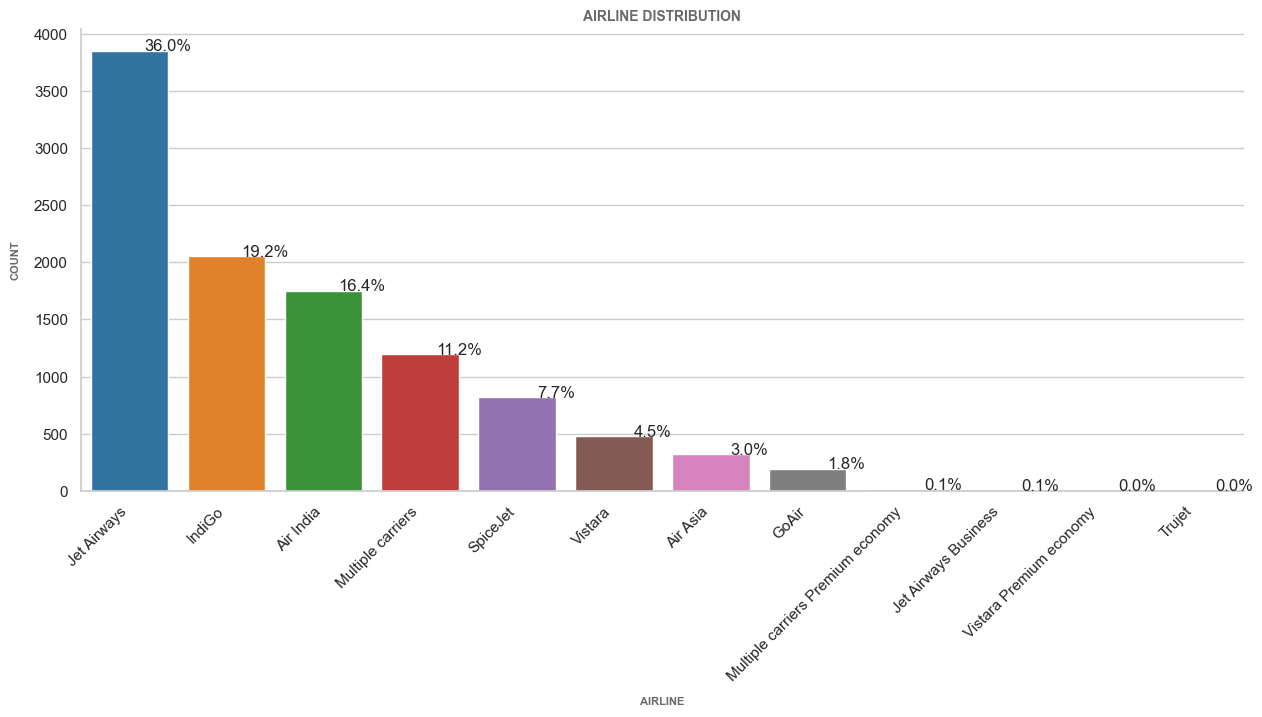

In [546]:
# Distribution Airlines

sns.set(style="whitegrid")
plt.figure(figsize=(15,6))

total = float(flight_df.shape[0])

ax = sns.countplot(x='Airline', data=flight_df, palette='tab10', order = flight_df['Airline'].value_counts().index)
sns.despine()
plt.title('AIRLINE DISTRIBUTION', fontsize = 10, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('AIRLINE', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 8)
plt.ylabel('COUNT', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 8);
plt.xticks(rotation=45, ha='right')
plt.show()

#### observation :
* Jet Airways has the highest share of flight trips, which very high when compared to others
* Trujet,Vistara premium economy,jet airways business and multiple carrier premuim economy has the lowest share of trips

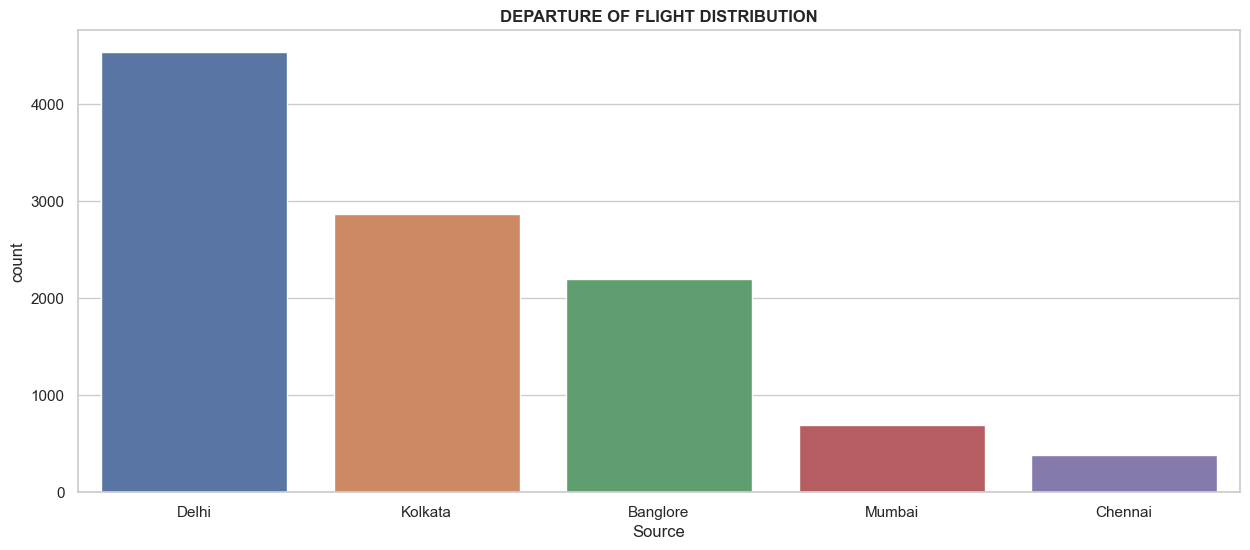

In [547]:
# source of flight distribution
plt.figure(figsize=(15,6))
sns.countplot(data = flight_df,x = 'Source',order = flight_df['Source'].value_counts().index )
plt.title('DEPARTURE OF FLIGHT DISTRIBUTION', fontweight = 'bold');

#### observation :
* Most trips are departing from Delhi,followed by Kolkata, Banglore,Mumbai,Chennai

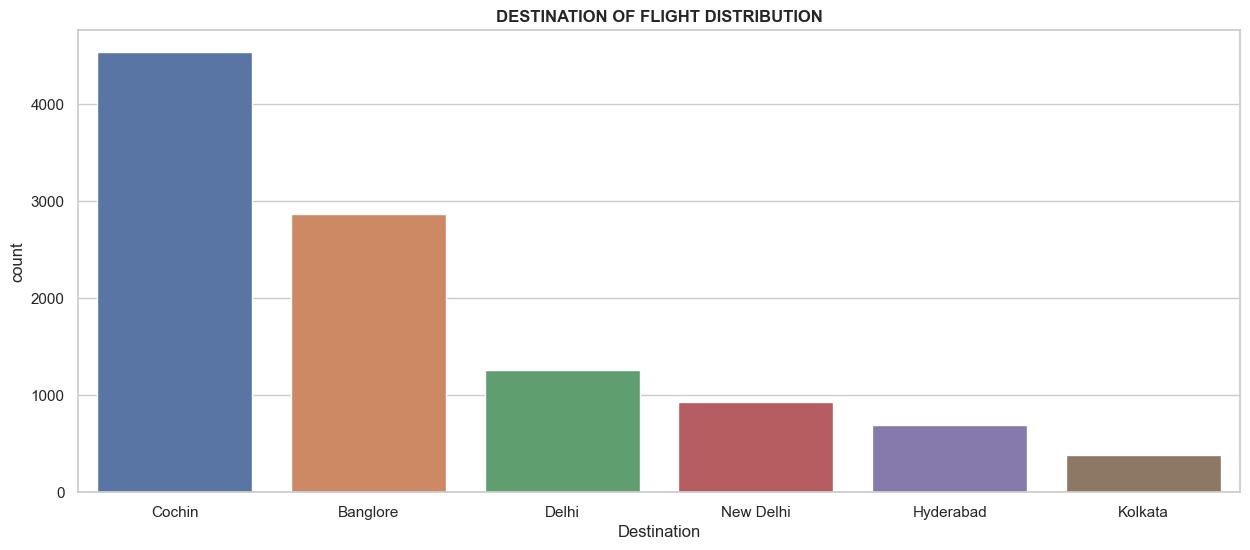

In [548]:
# destination distribution
plt.figure(figsize=(15,6))
sns.countplot(data = flight_df,x = 'Destination',order = flight_df['Destination'].value_counts().index )
plt.title('DESTINATION OF FLIGHT DISTRIBUTION', fontweight = 'bold');

#### observation :
* Least trips are going to Kolkata but also has the one of the hightest departing trips
* Cochin has the highest arrival trips

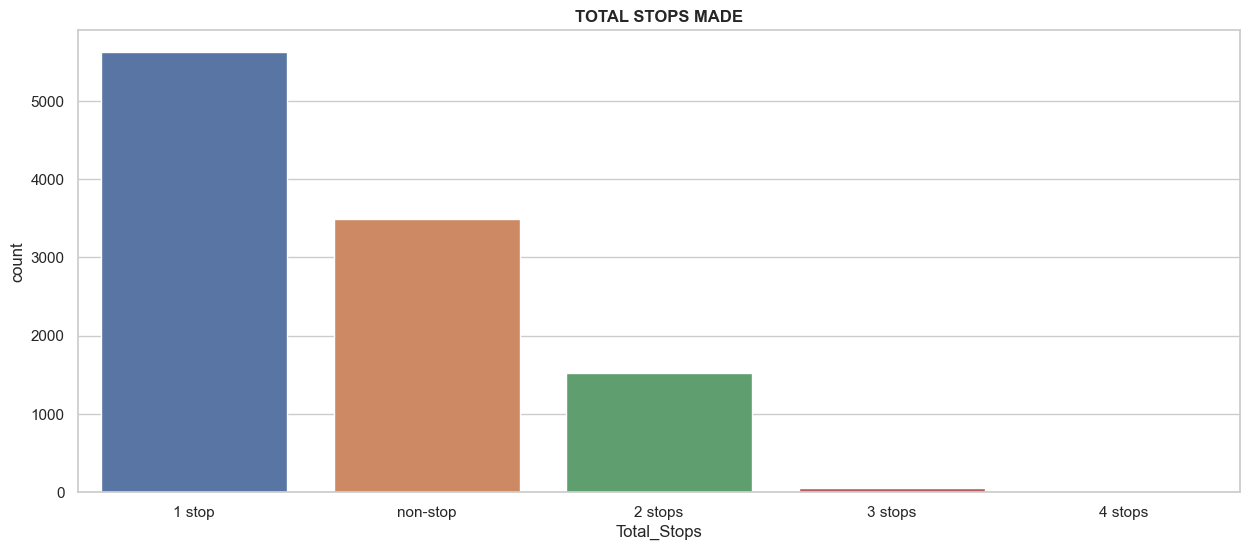

In [549]:
# total stops distribution
plt.figure(figsize=(15,6))
sns.countplot(data = flight_df,x = 'Total_Stops',order = flight_df['Total_Stops'].value_counts().index )
plt.title('TOTAL STOPS MADE', fontweight = 'bold');

#### observation :
* Most flights made just one stop,followed by direct flight

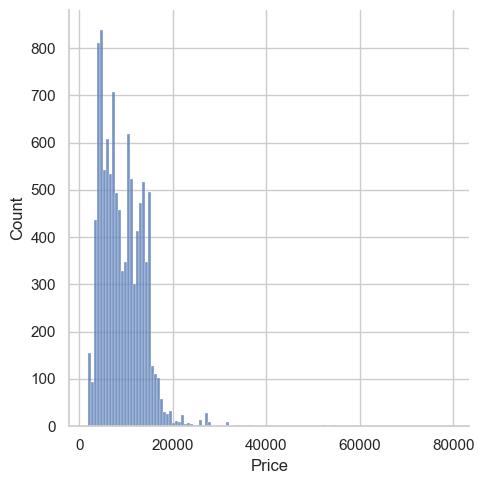

In [550]:
# distribution of prices
sns.displot(flight_df['Price']);

#### observation :
* Most ticket prices are around 0 to 20000

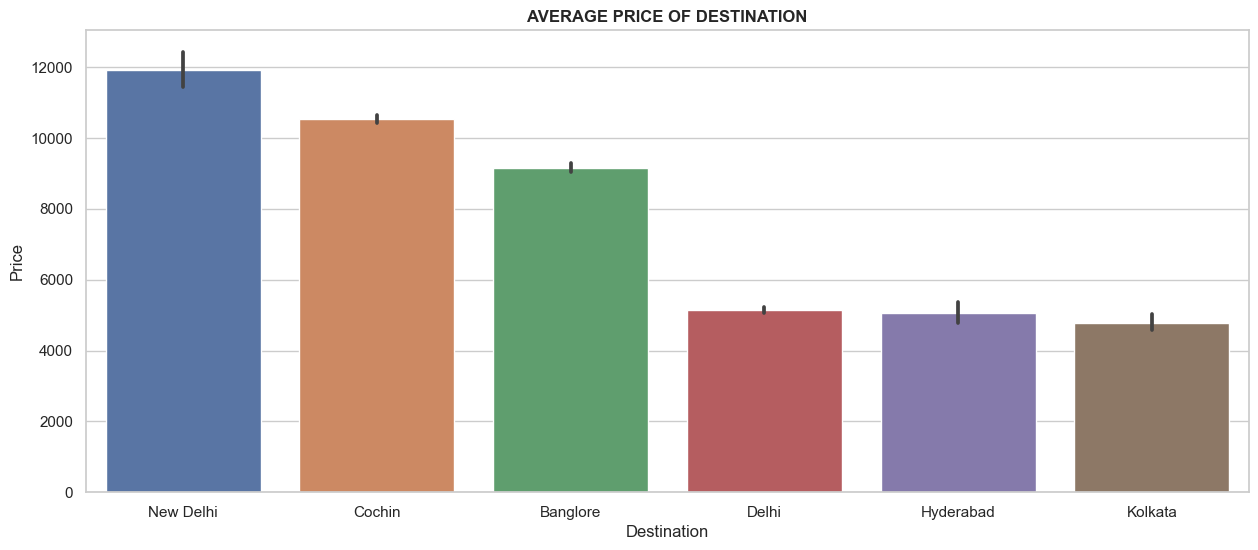

In [551]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Destination' , y= 'Price', data = flight_df,order = flight_df.groupby('Destination')['Price'].mean(
).sort_values(ascending = False).index);
plt.title('AVERAGE PRICE OF DESTINATION',fontweight = 'bold');

#### observation :
* New delhi is more expensive because the average price is higher alittle below 12000
* Kolhata has the lowest price

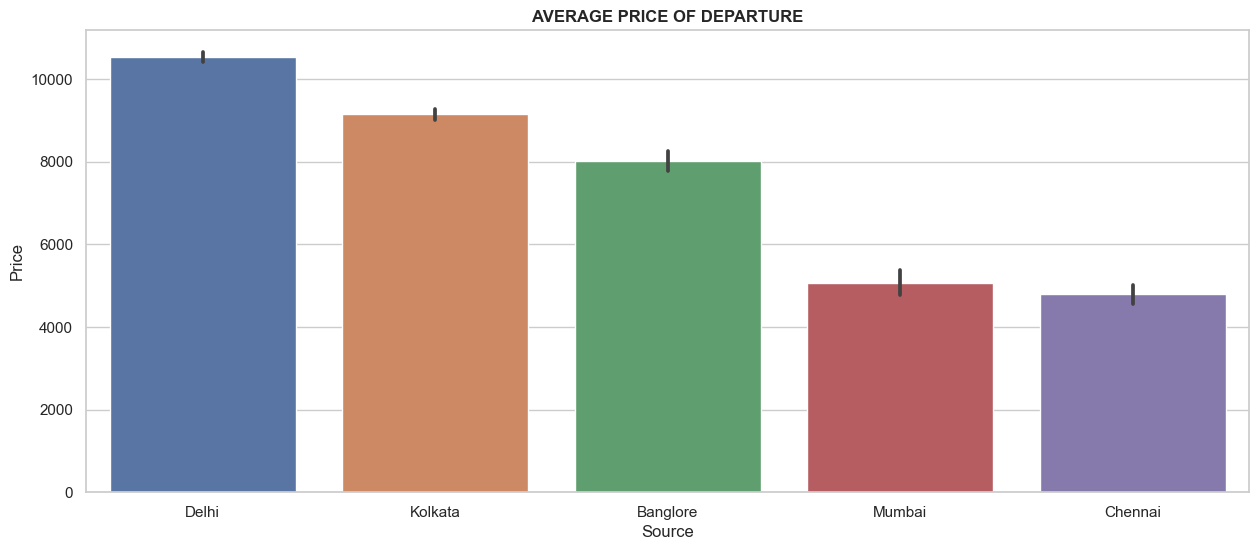

In [552]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Source' , y= 'Price', data = flight_df,order = flight_df.groupby('Source')['Price'].mean(
).sort_values(ascending = False).index);
plt.title('AVERAGE PRICE OF DEPARTURE',fontweight = 'bold');

#### observation :
* Dehli has the highest price from departing

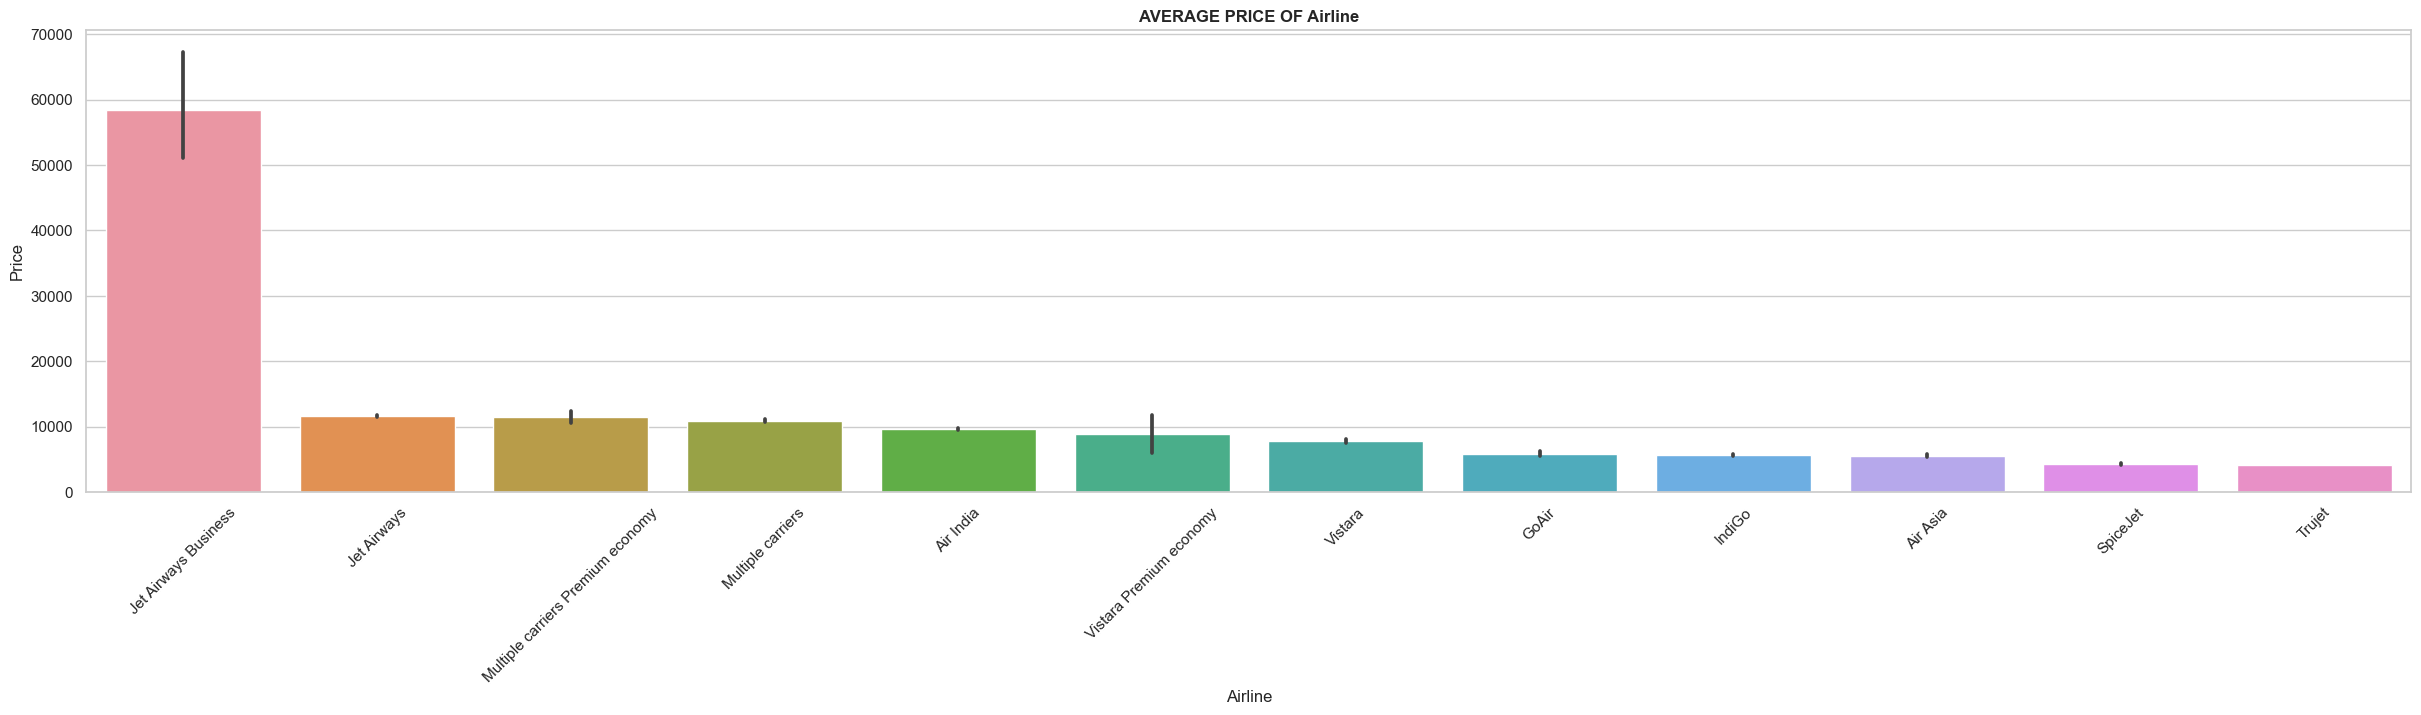

In [553]:
plt.figure(figsize=(30,6))
sns.barplot(x = 'Airline' , y= 'Price', data = flight_df,order = flight_df.groupby('Airline')['Price'].mean(
).sort_values(ascending = False).index);
plt.title('AVERAGE PRICE OF Airline',fontweight = 'bold')
plt.xticks(rotation = 45);

#### observation :
* jet airway business is extremely more expensive than the rest airlines

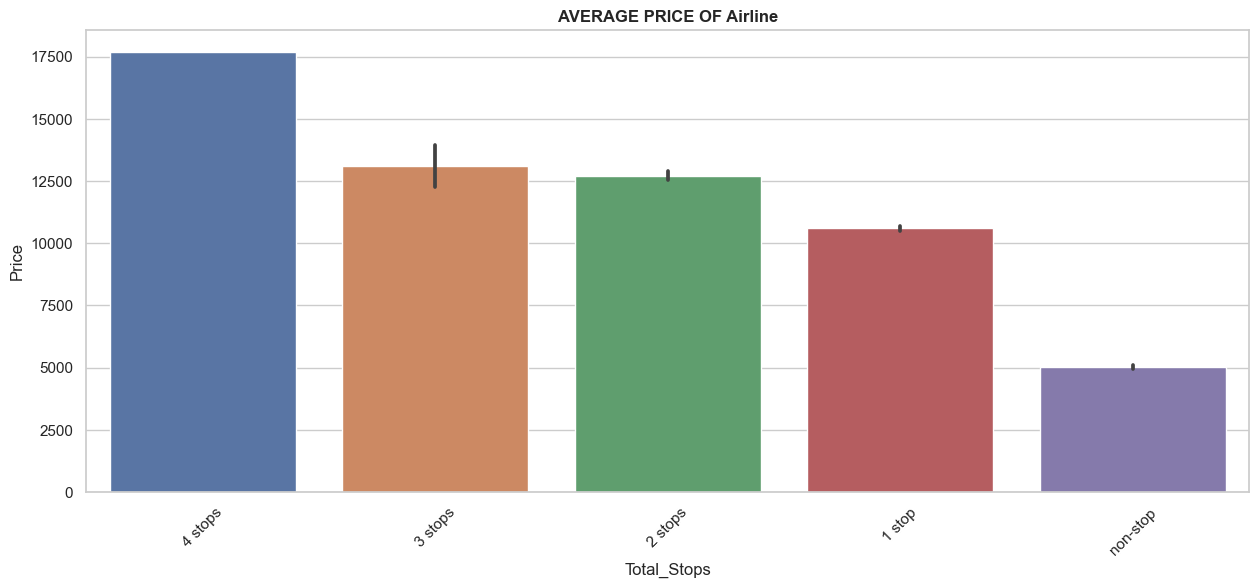

In [554]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Total_Stops' , y= 'Price', data = flight_df,order = flight_df.groupby('Total_Stops')['Price'].mean(
).sort_values(ascending = False).index);
plt.title('AVERAGE PRICE OF Airline',fontweight = 'bold')
plt.xticks(rotation = 45);

#### observation :
* if 4 stops are made in a trip,it become more expensive
* No stops is more cheaper

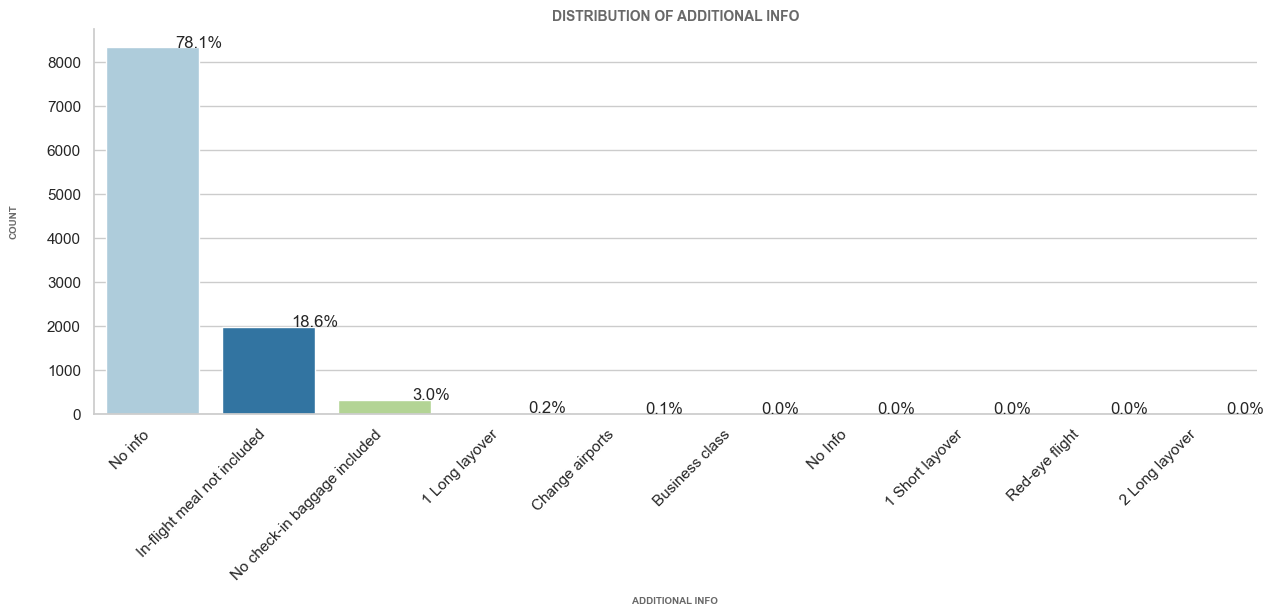

In [555]:
plt.figure(figsize=(15,5))

total = float(flight_df.shape[0])

ax = sns.countplot(x='Additional_Info', data=flight_df, palette='Paired', order = flight_df['Additional_Info'].value_counts().index)
sns.despine()
plt.title('DISTRIBUTION OF ADDITIONAL INFO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('ADDITIONAL INFO', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 7)
plt.ylabel('COUNT', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7);
plt.xticks(rotation=45, ha='right')
plt.show()

#### observation :
* this column does not give much information about the price

In [556]:
# drop additional info
flight_df.drop('Additional_Info',axis = 1,inplace = True)

In [557]:
# drop year of journey because all trips where made in 1029
flight_df.drop('year of journey',axis = 1,inplace = True)

In [558]:
flight_df

,Airline,Source,Destination,Total_Stops,Price,Duration_Total_Hour,month of journey,day of journey,hour of departure,minute of departure,hour of arrival,minute of arrival
0,IndiGo,Banglore,New Delhi,non-stop,3897,2.833333,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,7662,7.416667,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,13882,19.000000,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,6218,5.416667,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,13302,4.750000,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,2.500000,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,non-stop,4145,2.583333,4,27,20,45,23,20
10680,Jet Airways,Banglore,Delhi,non-stop,7229,3.000000,4,27,8,20,11,20
10681,Vistara,Banglore,New Delhi,non-stop,12648,2.666667,3,1,11,30,14,10


#### modelling

In [559]:
# converting categorical data to numbers
for col in flight_df.columns :
    if pd.api.types.is_string_dtype(flight_df[col]):
        flight_df[col] = flight_df[col].astype('category').cat.as_ordered()
        flight_df[col] = pd.Categorical(flight_df[col]).codes + 1

In [560]:
flight_df

,Airline,Source,Destination,Total_Stops,Price,Duration_Total_Hour,month of journey,day of journey,hour of departure,minute of departure,hour of arrival,minute of arrival
0,4,1,6,5,3897,2.833333,3,24,22,20,1,10
1,2,4,1,2,7662,7.416667,5,1,5,50,13,15
2,5,3,2,2,13882,19.000000,6,9,9,25,4,25
3,4,4,1,1,6218,5.416667,5,12,18,5,23,30
4,4,1,6,1,13302,4.750000,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,4,1,5,4107,2.500000,4,9,19,55,22,25
10679,2,4,1,5,4145,2.583333,4,27,20,45,23,20
10680,5,1,3,5,7229,3.000000,4,27,8,20,11,20
10681,11,1,6,5,12648,2.666667,3,1,11,30,14,10


In [561]:
# spliting inot x and y
x = flight_df.drop('Price',axis = 1)
y = flight_df['Price']

In [562]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((9079, 11), (1603, 11), (9079,), (1603,))

In [563]:
model = RandomForestRegressor(random_state = 42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [569]:
def rmse(y_test,y_preds):
    
    return np.sqrt(mean_absolute_error(y_test,y_preds))

def evaluation(model):
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    
    output = {
        'training MAE' : mean_absolute_error(y_train,train_preds),
        'test MAE' : mean_absolute_error(y_test,test_preds),
        'training MSE' : mean_squared_error(y_train,train_preds),
        'test MSE' : mean_squared_error(y_test,test_preds),
        'training r2 score' : r2_score(y_train,train_preds),
        'test r2 score' : r2_score(y_test,test_preds),
        'training rmse' : rmse(y_train,train_preds),
        'test rmse' : rmse(y_test,test_preds)
    }
    
    return pd.DataFrame(output,index = ['scores'])

In [570]:
evaluation(model)

,training MAE,test MAE,training MSE,test MSE,training r2 score,test r2 score,training rmse,test rmse
scores,576.734231,1168.488365,1.031961e+06,3.401285e+06,0.952294,0.822554,24.015292,34.183159


#### model optimization

In [574]:
rf_grid = {
    'n_estimators' : np.arange(10,100,10),
    'max_depth' : [None,3,5,10],
    'min_samples_split' : np.arange(2,20,2),
    'min_samples_leaf' : np.arange(1,20,2),
    'max_features' : [0.5,1,'sqrt','auto']
}

rs_model = RandomizedSearchCV(estimator = model , param_distributions = rf_grid,
                             verbose = True , n_iter = 100 , cv = 5)
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [603]:
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': None}

In [575]:
evaluation(rs_model)

,training MAE,test MAE,training MSE,test MSE,training r2 score,test r2 score,training rmse,test rmse
scores,980.61519,1128.832858,2.609583e+06,2.712854e+06,0.879362,0.858469,31.314776,33.598108


After doinging hyperparameter tuning,the test MAE,r2_score and rmse improved

In [600]:
# Absolute Difference between Y_test and Y_pred

dif= pd.DataFrame({'Y_test':y_test,'Y_pred':rs_model.predict(x_test), 'Absolute Difference': (y_test-(rs_model.predict(x_test))).abs().round(2)})
dif.head(15)

,Y_test,Y_pred,Absolute Difference
1531,7229,7293.714667,64.71
9169,12192,12285.315939,93.32
5826,14714,12231.530051,2482.47
5618,5999,9741.908185,3742.91
9996,15965,16601.417252,636.42
9214,15135,14666.661814,468.34
10286,10262,10489.632343,227.63
231,4460,4342.697400,117.30
99,14300,13963.452050,336.55
4550,9736,9780.285241,44.29


In [578]:
def preprocessor(flight_df):
    flight_df["Duration_Total_Hour"] = flight_df["Duration"].str.replace("h", '*1').str.replace(' ', '+').str.replace('m', '/60').apply(eval)
    flight_df.drop('Duration',axis = 1, inplace=True)
    flight_df['Date_of_Journey'] = pd.to_datetime(flight_df['Date_of_Journey'],format = '%d/%m/%Y')
    flight_df['year of journey'] = flight_df['Date_of_Journey'].dt.year
    flight_df['month of journey'] =flight_df['Date_of_Journey'].dt.month
    flight_df['day of journey'] = flight_df['Date_of_Journey'].dt.day


    flight_df['Dep_Time'] = pd.to_datetime(flight_df['Dep_Time'],format = '%H:%M')
    flight_df['hour of departure'] = flight_df['Dep_Time'].dt.hour
    flight_df['minute of departure'] = flight_df['Dep_Time'].dt.minute

    flight_df['Arrival_Time'] =  pd.to_datetime(flight_df['Arrival_Time'],format = '%H:%M %d %b',errors ='coerce').fillna(
        pd.to_datetime(flight_df['Arrival_Time'],format = '%H:%M',errors = 'coerce'))
    flight_df['hour of arrival'] = flight_df['Arrival_Time'].dt.hour
    flight_df['minute of arrival'] = flight_df['Arrival_Time'].dt.minute

    flight_df.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis = 1,inplace = True)
    flight_df.drop('Route',axis = 1,inplace = True)
    flight_df.drop('Additional_Info',axis = 1,inplace = True)
    flight_df.drop('year of journey',axis = 1,inplace = True)
    for col in flight_df.columns :
        if pd.api.types.is_string_dtype(flight_df[col]):
            flight_df[col] = flight_df[col].astype('category').cat.as_ordered()
            flight_df[col] = pd.Categorical(flight_df[col]).codes + 1

#### loading test data

In [579]:
test_df = pd.read_excel('Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [582]:
# preprocessing the test dataset
test_df = preprocessor(test_df)

KeyError: 'Duration'

In [583]:
test_df.head()

,Airline,Source,Destination,Total_Stops,Duration_Total_Hour,month of journey,day of journey,hour of departure,minute of departure,hour of arrival,minute of arrival
0,5,3,2,1,10.916667,6,6,17,30,4,25
1,4,4,1,1,4.000000,5,12,6,20,10,20
2,5,3,2,1,23.750000,5,21,19,15,19,0
3,7,3,2,1,13.000000,5,21,8,0,21,0
4,1,1,3,5,2.833333,6,24,23,55,2,45


In [584]:
rs_predict = model.predict(test_df)

In [589]:
df_preds = pd.DataFrame()
df_preds['ID'] = test_df.index
df_preds['Price'] = rs_predict
df_preds

,ID,Price
0,0,10518.620000
1,1,4226.000000
2,2,14442.581667
3,3,13007.161667
4,4,3748.580000
...,...,...
2666,2666,10171.570000
2667,2667,4801.156667
2668,2668,14219.841000
2669,2669,13757.460000


In [590]:
df_preds.to_csv('test_prediction.csv',index = False)

In [626]:
# save model
joblib.dump(rs_model, 'flight prediction model.pkl') 

['flight prediction model.pkl']

#### feature importance

In [617]:
reg = RandomForestRegressor(n_estimators = 50,
 min_samples_split = 16,
 min_samples_leaf =  1,
 max_features = 0.5,
 max_depth =  None)
reg.fit(x_train,y_train)
importance = dict(zip(x.columns,list(reg.feature_importances_)))

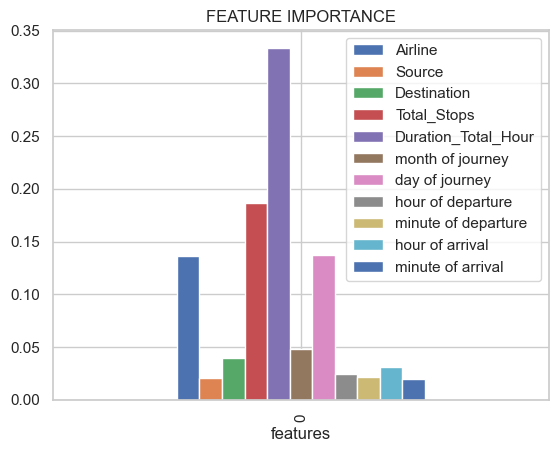

In [622]:
import_df = pd.DataFrame(importance,index = [0])
import_df.plot.bar()
plt.title('FEATURE IMPORTANCE')
plt.xlabel('features');

#### observation :
* flight duration is very important when predicting flight ticket prices 